In [11]:

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

<h2 align="center">Regresión polinomial</h2>

In [12]:
X = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [13]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [14]:
transformer.fit(X)

PolynomialFeatures(include_bias=False)

In [15]:
X_ = transformer.transform(X)

In [16]:
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [17]:
model = LinearRegression().fit(X_, y)

In [18]:
r_sq = model.score(X_, y)
print(f"coeficiente de determinación: {r_sq}")


print(f"intercepto: {model.intercept_}")

print(f"coeficientes: {model.coef_}")


coeficiente de determinación: 0.8908516262498564
intercepto: 21.37232142857144
coeficientes: [-1.32357143  0.02839286]


In [19]:
y_pred = model.predict(X_)
print(f"predicción:\n{y_pred}")

predicción:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


<h2 align="center">Regresión lineal múltiple</h2>

$$f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j.$$

**Regresión lineal simple**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Regresión lineal múltiple**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>


In [20]:
advert = pd.read_csv("Advertising.csv")

advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


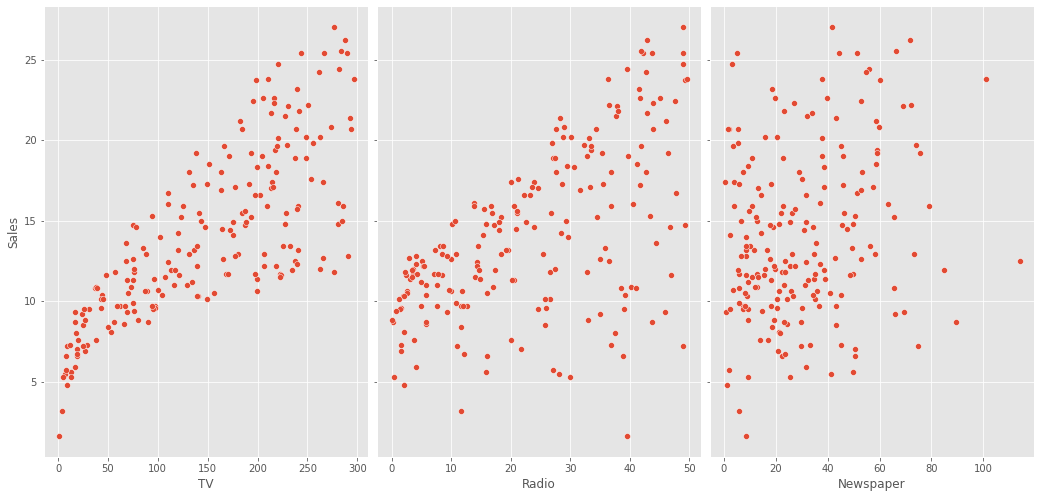

In [24]:
sns.pairplot(advert, x_vars =["TV", "Radio", "Newspaper"], y_vars = "Sales", height=7, aspect=0.7)

In [26]:
from sklearn.linear_model import LinearRegression

X = advert[["TV", "Radio", "Newspaper"]]
y = advert.Sales


lm1 = LinearRegression()
lm1.fit(X,y)

print(lm1.intercept_)
print(lm1.coef_)


2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


<AxesSubplot:>

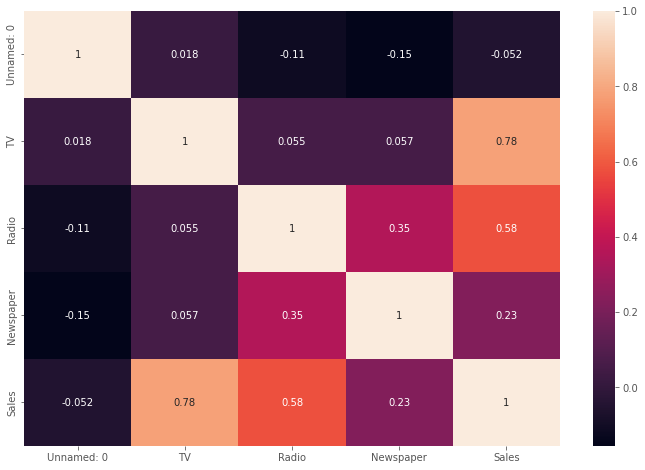

In [27]:
sns.heatmap(advert.corr(), annot =True)

In [28]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[["TV","Radio"]], y)
lm2_pred = lm2.predict(X[["TV", "Radio" ] ]  )

print("R^2:", r2_score(y, lm2_pred) )

lm3 = LinearRegression().fit(X[["TV","Radio", "Newspaper"]], y)
lm3_pred = lm3.predict(X[["TV", "Radio", "Newspaper" ] ]  )

print("R^2:", r2_score(y, lm3_pred) )

R^2: 0.8971942610828957
R^2: 0.8972106381789522


In [29]:
lm2 = LinearRegression().fit(X[["TV","Radio"]], y)
lm2_pred = lm2.predict(X[["TV", "Radio" ] ]  )

print("R^2:", r2_score(y, lm2_pred) )

lm3 = LinearRegression().fit(X[["TV","Radio", "Newspaper"]], y)
lm3_pred = lm3.predict(X[["TV", "Radio", "Newspaper" ] ]  )

print("R^2:", r2_score(y, lm3_pred) )

R^2: 0.8971942610828957
R^2: 0.8972106381789522


**Mean Absolute Error** (MAE): <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) : <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) : <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X = advert[["TV", "Radio", "Newspaper" ] ]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 )

lm4 = LinearRegression().fit( X_train, y_train )
lm4_pred = lm4.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, lm4_pred)) )
print("R^2:", r2_score(y_test, lm4_pred))


RMSE: 1.404651423032895
R^2: 0.9156213613792232


In [33]:
X = advert[["TV", "Radio" ] ]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 )

lm5 = LinearRegression().fit( X_train, y_train )
lm5_pred = lm5.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, lm5_pred)) )
print("R^2:", r2_score(y_test, lm5_pred))

RMSE: 1.3879034699382888
R^2: 0.9176214942248907


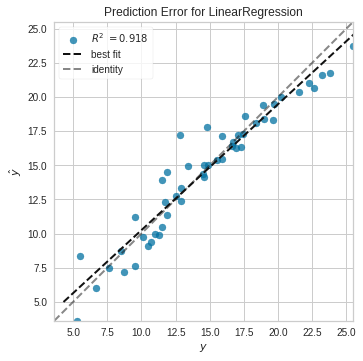

In [34]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm5).fit( X_train, y_train)
visualizer.score(X_test, y_test) 
visualizer.poof();

In [36]:
advert["interaction"] = advert["TV"]*advert["Radio"]

X= advert[["TV", "Radio", "interaction" ] ]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 )

lm6 = LinearRegression().fit( X_train, y_train )
lm6_pred = lm6.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, lm6_pred)) )
print("R^2:", r2_score(y_test, lm6_pred))


RMSE: 0.7011871137164328
R^2: 0.978973681468126


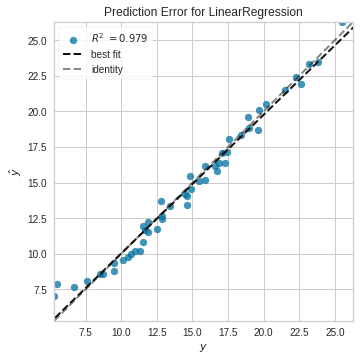

In [37]:
visualizer = PredictionError(lm6).fit( X_train, y_train)
visualizer.score(X_test, y_test) 
visualizer.poof();

In [38]:
import numpy as np
import statsmodels.api as sm

In [39]:
X = [ [0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

X, y = np.array(X), np.array(y)

In [40]:
X = sm.add_constant(X)

In [41]:
model = sm.OLS(y, X)

In [42]:
results = model.fit()

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Wed, 15 Mar 2023   Prob (F-statistic):            0.00713
Time:                        01:28:46   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

In [44]:
print(f"coeficiente de determinación: {results.rsquared}")


print(f"coeficiente de determinación ajustado: {results.rsquared_adj}")


print(f"coeficientes de regresión: {results.params}")

coeficiente de determinación: 0.8615939258756776
coeficiente de determinación ajustado: 0.8062314962259487
coeficientes de regresión: [5.52257928 0.44706965 0.25502548]


In [45]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))

In [46]:
y_new = results.predict(x_new)

y_new

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     320.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.89e-86
Time:                        01:35:37   Log-Likelihood:                -1537.7
No. Observations:                 441   AIC:                             3081.
Df Residuals:                     438   BIC:                             3094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5052      0.378    -11.924      0.0

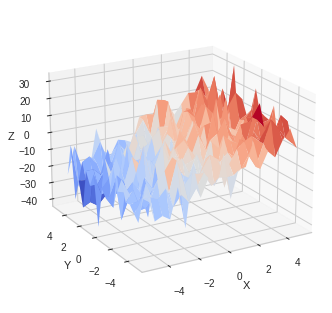

In [48]:
# TABLA (M)ANOVA

from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols

from statsmodels.stats.anova import anova_lm

##############################################################################

x = np.linspace(-5, 5, 21)

X, Y = np.meshgrid(x, x)


np.random.seed(1)


Z = -5 + 3*X - 0.5*Y + 8 * np.random.normal(size=X.shape)


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

##############################################################################

X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

data = pd.DataFrame({'x': X, 'y': Y, 'z': Z})


model = ols("z ~ x + y", data).fit()


print(model.summary())

print("\nEstimaciones:")
print(model._results.params)



anova_results = anova_lm(model)

print('\nANOVA')
print(anova_results)

plt.show()